In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn_pandas import DataFrameMapper, CategoricalImputer, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.linear_model import ElasticNetCV, Ridge, ElasticNet
from sklearn.metrics import r2_score
import xgboost as xgb
import catboost as cb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt



from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


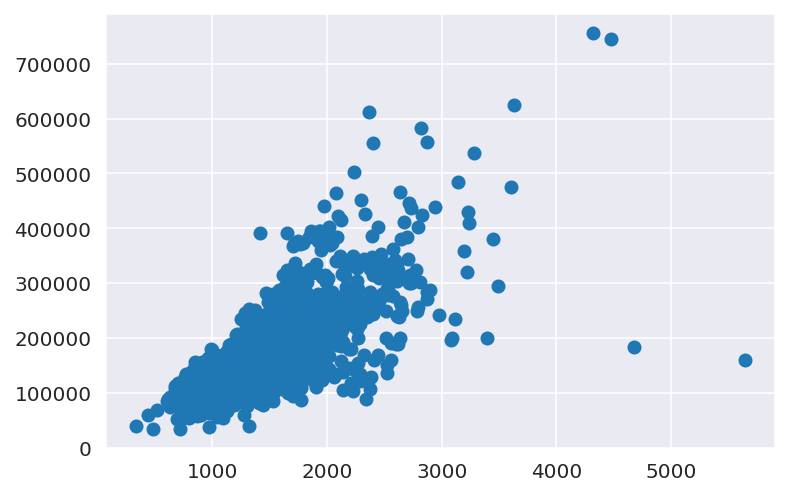

In [6]:
plt.scatter(df['GrLivArea'], df['SalePrice'])

In [7]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] <200_000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [8]:
df = df.drop([523,1298])

In [9]:
# df = df.dropna(thresh=76) 

In [10]:
target = 'SalePrice'
y = np.log(df[target])
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
mapper = DataFrameMapper([
    (['MSSubClass'], [SimpleImputer(), StandardScaler()]),
    (['MSZoning'], [CategoricalImputer(), LabelBinarizer()]),
    (['LotFrontage'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['LotArea'], [SimpleImputer(), StandardScaler()]),
    (['Street'], [CategoricalImputer(), LabelBinarizer()]),
    (['Alley'], [CategoricalImputer(strategy='constant',fill_value='None'), LabelBinarizer()]),
    (['LotShape'], [CategoricalImputer(), LabelBinarizer()]),
    (['LandContour'], [CategoricalImputer(), LabelBinarizer()]),
    (['Utilities'], [CategoricalImputer(), LabelBinarizer()]),
    (['LotConfig'], [CategoricalImputer(), LabelBinarizer()]),
    (['LandSlope'], [CategoricalImputer(), LabelBinarizer()]),
    (['Neighborhood'], [CategoricalImputer(), LabelBinarizer()]),
    (['Condition1'], [CategoricalImputer(), LabelBinarizer()]),
    (['Condition2'], [CategoricalImputer(), LabelBinarizer()]),
    (['BldgType'], [CategoricalImputer(), LabelBinarizer()]),
    (['HouseStyle'], [CategoricalImputer(), LabelBinarizer()]),
    (['OverallQual'], [SimpleImputer(), StandardScaler()]),
    (['OverallCond'], [SimpleImputer(), StandardScaler()]),
    (['YearBuilt'], [SimpleImputer(), StandardScaler()]),
    (['YearRemodAdd'], [SimpleImputer(), StandardScaler()]),
    (['RoofStyle'], [CategoricalImputer(), LabelBinarizer()]),
    (['RoofMatl'], [CategoricalImputer(), LabelBinarizer()]),
    (['Exterior1st'], [CategoricalImputer(), LabelBinarizer()]),
    (['Exterior2nd'], [CategoricalImputer(), LabelBinarizer()]),
    (['MasVnrType'], [CategoricalImputer(strategy='constant',fill_value='None'), LabelBinarizer()]),
    (['MasVnrArea'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['ExterQual'], [CategoricalImputer(), LabelBinarizer()]),
    (['ExterCond'], [CategoricalImputer(), LabelBinarizer()]),
    (['Foundation'], [CategoricalImputer(), LabelBinarizer()]),
    (['BsmtQual'], [CategoricalImputer(), LabelBinarizer()]),
    (['BsmtCond'], [CategoricalImputer(), LabelBinarizer()]),
    (['BsmtExposure'], [CategoricalImputer(), LabelBinarizer()]),
    (['BsmtFinType1'], [CategoricalImputer(), LabelBinarizer()]),
    (['BsmtFinSF1'], [SimpleImputer(), StandardScaler()]),
    (['BsmtFinType2'], [CategoricalImputer(), LabelBinarizer()]),
    (['BsmtFinSF2'], [SimpleImputer(), StandardScaler()]),
    (['BsmtUnfSF'], [SimpleImputer(), StandardScaler()]),
    (['TotalBsmtSF'], [SimpleImputer(), StandardScaler()]),
    (['Heating'], [CategoricalImputer(), LabelBinarizer()]),
    (['HeatingQC'], [CategoricalImputer(), LabelBinarizer()]),
    (['CentralAir'], [CategoricalImputer(), LabelBinarizer()]),
    (['Electrical'], [CategoricalImputer(), LabelBinarizer()]),
    (['1stFlrSF'], [SimpleImputer(), StandardScaler()]),
    (['2ndFlrSF'], [SimpleImputer(), StandardScaler()]),
    (['LowQualFinSF'], [SimpleImputer(), StandardScaler()]),
    (['GrLivArea'], [SimpleImputer(), StandardScaler()]),
    (['BsmtFullBath'], [SimpleImputer(), StandardScaler()]),
    (['BsmtHalfBath'], [SimpleImputer(), StandardScaler()]),
    (['FullBath'], [SimpleImputer(), StandardScaler()]),
    (['HalfBath'], [SimpleImputer(), StandardScaler()]),
    (['BedroomAbvGr'], [SimpleImputer(), StandardScaler()]),
    (['KitchenAbvGr'], [SimpleImputer(), StandardScaler()]),
    (['KitchenQual'], [CategoricalImputer(), LabelBinarizer()]),
    (['TotRmsAbvGrd'], [SimpleImputer(), StandardScaler()]),
    (['Functional'], [CategoricalImputer(strategy='constant',fill_value='Typ'), LabelBinarizer()]),
    (['Fireplaces'], [SimpleImputer(), StandardScaler()]),
    (['FireplaceQu'], [CategoricalImputer(strategy='constant',fill_value='None'), LabelBinarizer()]),
    (['GarageType'], [CategoricalImputer(), LabelBinarizer()]),
    (['GarageYrBlt'], [SimpleImputer(), StandardScaler()]),
    (['GarageFinish'], [CategoricalImputer(), LabelBinarizer()]),
    (['GarageCars'], [SimpleImputer(), StandardScaler()]),
    (['GarageArea'], [SimpleImputer(), StandardScaler()]),
    (['GarageQual'], [CategoricalImputer(), LabelBinarizer()]),
    (['GarageCond'], [CategoricalImputer(), LabelBinarizer()]),
    (['PavedDrive'], [CategoricalImputer(), LabelBinarizer()]),
    (['WoodDeckSF'], [SimpleImputer(), StandardScaler()]),
    (['OpenPorchSF'], [SimpleImputer(), StandardScaler()]),
    (['EnclosedPorch'], [SimpleImputer(), StandardScaler()]),
    (['3SsnPorch'], [SimpleImputer(), StandardScaler()]),
    (['ScreenPorch'], [SimpleImputer(), StandardScaler()]),
    (['PoolArea'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['PoolQC'], [CategoricalImputer(strategy='constant',fill_value='None'), LabelBinarizer()]),
    (['Fence'], [CategoricalImputer(fill_value='None'), LabelBinarizer()]),
    (['MiscFeature'], [CategoricalImputer(strategy='constant',fill_value='None'), LabelBinarizer()]),
    (['MiscVal'], [SimpleImputer(), StandardScaler()]),
    (['MoSold'], [SimpleImputer(), StandardScaler()]),
    (['YrSold'], [SimpleImputer(), StandardScaler()]),
    (['SaleType'], [CategoricalImputer(), LabelBinarizer()]),
    (['SaleCondition'], [CategoricalImputer(), LabelBinarizer()]),
 ], df_out=True)

In [14]:
Z_train = mapper.fit_transform(X_train)
Z_test = mapper.transform(X_test)

In [15]:
Z_train

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage,LotArea,Street,Alley_Grvl,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
848,-0.154991,0,0,0,1,0,0.248798,3.190015,1,0,...,0,0,0,1,0,0,0,0,1,0
810,-0.860356,0,0,0,1,0,0.390674,-0.048453,1,0,...,0,0,0,1,0,0,0,0,1,0
1384,-0.154991,0,0,0,1,0,-0.460584,-0.147086,1,0,...,0,0,0,1,0,0,0,0,1,0
1062,3.136711,0,0,0,0,1,0.721718,0.267540,1,1,...,0,0,0,1,0,0,0,0,1,0
953,0.080131,0,0,0,1,0,0.000000,0.036938,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.315252,0,0,0,0,1,-0.460584,-0.345997,1,0,...,0,0,0,1,0,0,0,0,1,0
1131,-0.860356,0,0,0,1,0,-0.318708,0.003786,1,0,...,0,0,1,0,1,0,0,0,0,0
1295,-0.860356,0,0,0,1,0,0.012337,-0.207362,1,0,...,0,0,0,1,0,0,0,0,1,0
861,3.136711,0,0,0,1,0,0.248798,0.087168,1,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
model = LinearRegression()
model.fit(Z_train,y_train)
print(model.score(Z_train,y_train))
print(model.score(Z_test, y_test))

0.9527730976342025
-2.2317381458745348e+16


In [17]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.001, 0.01, 1,100)

# Set up our l1 ratio
enet_ratio = 0.3

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(Z_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(Z_test)
enet_model_preds_train = enet_model.predict(Z_train)

# Evaluate model.
print(r2_score(y_test, enet_model_preds))
print(r2_score(y_train, enet_model_preds_train))

0.9187355872859789
0.9433246069149095


In [18]:
model = RandomForestRegressor()
model.fit(Z_train,y_train)
print(model.score(Z_train,y_train))
print(model.score(Z_test, y_test))
print(sqrt(mean_squared_error(y_test, model.predict(Z_test))))

0.9818381448845626
0.8835733910325458


NameError: name 'sqrt' is not defined

In [ ]:

# GridSearchCV to find best params for the pipe
model = cb.CatBoostRegressor()
params = {
    'iterations': [100,500],
    'learning_rate': [0.1,0.3,0.7],
    'depth': [4, 10],
    'early_stopping_rounds':[10,20],
    'l2_leaf_reg': [1,3,5]
}
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=1)
grid.fit(Z_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
/home/jordan/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [19]:

sqrt(mean_squared_error(y_test, grid.predict(Z_test)))

NameError: name 'grid' is not defined

## Outliers

In [ ]:
er = ElasticNet(alpha=0.001, l1_ratio=0.99)
er.fit(Z_train, y_train)
np.sqrt(-cross_val_score(er, Z_test, y_test, cv=5, scoring="neg_mean_squared_error")).mean()


In [ ]:
y_pred = er.predict(Z_train)
resid = y_train - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers2 = np.where(abs(z) > abs(z).std() * 4)[0]
outliers2

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred)
plt.scatter(y_train.iloc[outliers2], y_pred[outliers2])
plt.plot(range(10, 15), range(10, 15), color="red")

In [ ]:
outliers2

In [ ]:
Z_train = Z_train.drop(Z_train.index[[outliers2]])

In [ ]:
y_train = y_train.drop(y_train.index[[outliers2]])

In [ ]:
{'depth': 4, 'early_stopping_rounds': 10, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [ ]:
model = cb.CatBoostRegressor(depth=4,
                             early_stopping_rounds=10,
                             iterations=500,
                             l2_leaf_reg=5,
                             learning_rate=0.1)


In [ ]:
model.fit(Z_train,y_train)
print(model.score(Z_train,y_train))
print(model.score(Z_test, y_test))

In [ ]:
out_df = pd.read_csv('test.csv')

In [ ]:
ZZ_test = mapper.transform(out_df)

In [ ]:
final_df = pd.DataFrame(zip(list(out_df['Id']),model.predict(ZZ_test)), columns = ['Id','SalePrice'])

In [ ]:
final_df['SalePrice'] = np.exp(final_df['SalePrice'])

In [ ]:
final_df

In [ ]:
final_df.to_csv('sub8.csv', index=False)